# Analysis Objectives

1. Explore data engineering job demand by company profile
2. Find the most and the least needed skills for data engineering jobs
3. Salary statistical summary and how it correlates to company profile and job specification

# Table of Content
- Load Data
- Job Demand Summary
    1. Skill Demand
    2. Education and Experience Requirement
    3. Company Rating and Industry Relevance
- Salary Analysis
    1. Examine Salary Data
    2. Salary Correlation with Company Profile & Job Specification
    3. Segmentation Analysis
- Observation
- Conclusion
- Next Steps

# Load Data

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

# Filter warnings 
import warnings
warnings.filterwarnings('ignore')

In [2]:
SalaryData = pd.read_csv("glassdoor-data-engineer-kaggle_cleaned.csv")
print('# of rows = ',SalaryData.shape[0])
print(SalaryData.columns)
SalaryData.head()

# of rows =  845
Index(['company', 'company_rating', 'location', 'job_title', 'job_description',
       'salary_estimate', 'company_size', 'company_type', 'company_sector',
       'company_industry', 'company_founded', 'company_revenue', 'job_state',
       'seniority', 'job_languages', 'job_cloud', 'job_viz', 'job_databases',
       'job_bigdata', 'job_devops', 'job_education', 'degree_sentence',
       'exp_sentence', 'job_experience'],
      dtype='object')


,company,company_rating,location,job_title,job_description,salary_estimate,company_size,company_type,company_sector,company_industry,...,job_languages,job_cloud,job_viz,job_databases,job_bigdata,job_devops,job_education,degree_sentence,exp_sentence,job_experience
0,PCS Global Tech\n4.7,4.7,"Riverside, CA",Data Engineer | PAID BOOTCAMP,Responsibilities\n· Analyze and organize raw d...,70000.0,501 to 1000 Employees,Company - Private,Information Technology,Information Technology Support Services,...,"['sql', 'python', 'java']",[],[],[],[],[],bachelor,"· Degree in Computer Science, IT, or similar f...",00 per year,0-2 years
1,Futuretech Consultants LLC,NaN,"Newton, MS",Snowflake Data Engineer,My name is Dileep and I am a recruiter at Futu...,76500.0,NaN,NaN,NaN,NaN,...,['sql'],['snowflake'],['ssis'],['snowflake'],[],[],bachelor,"Bachelor’s Degree in Computer Science, IT, or ...",NaN,5-10 years
2,Clairvoyant\n4.4,4.4,Remote,Data Engineer (MDM),Required Skills:\nMust have 5-8+ Years of expe...,121500.0,51 to 200 Employees,Company - Private,Pharmaceutical & Biotechnology,Biotech & Pharmaceuticals,...,"['sql', 'python']","['databricks', 'aws']",[],[],['spark'],[],master,NaN,MDM (Master Data Management): 1 year (Required),5-10 years
3,Apple\n4.2,4.2,"Cupertino, CA",Data Engineer,"Summary\nPosted: Dec 22, 2021\nWeekly Hours: 4...",NaN,10000+ Employees,Company - Public,Information Technology,Computer Hardware Development,...,['python'],[],['tableau'],[],[],[],NaN,NaN,NaN,NaN
4,Skytech Consultancy Services\n5.0,5.0,"Baltimore, MD",Data Engineer,Description of Work:\nTechnical experience in ...,117000.0,1 to 50 Employees,Company - Public,NaN,NaN,...,['sql'],[],['tableau'],['oracle'],[],[],bachelor,Bachelor's or master's degree in a training re...,NaN,5-10 years


# Job Demand Summary

## 1. Skill Demand

### Extracting skill keywords of each job specification

In [3]:
cols = ['job_languages', 'job_cloud', 'job_viz', 'job_databases', 'job_bigdata', 'job_devops']

def safe_eval(x):
    try:
        return eval(x)
    except:
        return x

SalaryData[cols] = SalaryData[cols].astype(str).applymap(safe_eval)

In [4]:
prog_languages = ['python', 'java', 'scala', 'go', 'r', 'c++', 'c#', 'sql', 'nosql', 'rust', 'shell']
cloud_tools = ['aws', 'azure', 'google cloud', 'snowflake', 'databricks', 'redshift']
viz_tools = ['power bi', 'tableau', 'excel', 'ssis', 'qlik', 'sap', 'looker']
databases = ['sql server', 'postgresql', 'mongodb', 'mysql', 'oracle', 'casandra', 'elasticsearch', 'dynamodb', 'snowflake', 'redis', 'neo4j', 'hive', 'dbt']
big_data = ['spark', 'hadoop', 'kafka', 'flink']
devops = ['gitlab', 'terraform', 'docker', 'bash', 'ansible']

### Define a function to aggregate and visualize data

In [5]:
sns.set_theme(style='darkgrid', palette='Set2', font='Verdana')

def chart_data(cols_data, tools, title, head=10):
    #get keywords of tools in a column
    count_tools = pd.DataFrame(cols_data.sum()).value_counts().rename_axis('tools').reset_index(name='counts')
    #get frequency of ocuurrence of word( as word only appears once per line)
    length = len(cols_data)
    count_tools['%'] = (100*count_tools.counts / length).round(decimals=1)
    #plot the results
    count_tools = count_tools[count_tools.tools.isin(tools)]
    count_tools = count_tools.head()
    plt.figure(figsize=(15, 5))
    plot = sns.barplot(x = "tools", y = "%", data = count_tools)
    plt.xlabel("")
    plt.ylabel("Occurrency in Job Posting (%)")
    plt.xticks(rotation = 35, ha = "right")
    plt.title(title)
    plt.show(plot)
    print(count_tools)

### Use the function for each job specification

#### Programming Language

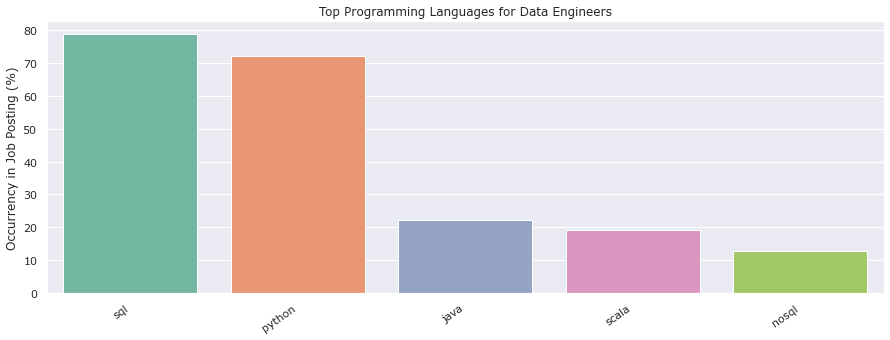

    tools  counts     %
0     sql     666  78.8
1  python     610  72.2
2    java     187  22.1
3   scala     161  19.1
4   nosql     109  12.9


In [6]:
chart_data(SalaryData['job_languages'], prog_languages,title= "Top Programming Languages for Data Engineers")

#### Cloud Tool

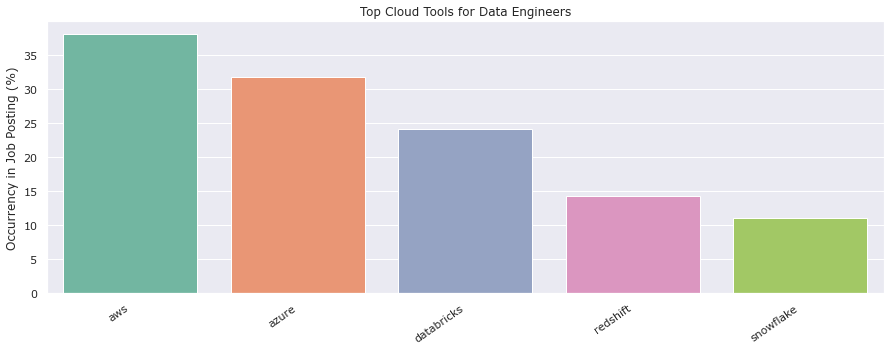

        tools  counts     %
0         aws     321  38.0
1       azure     268  31.7
2  databricks     204  24.1
3    redshift     121  14.3
4   snowflake      93  11.0


In [7]:
chart_data(SalaryData['job_cloud'], cloud_tools,title= "Top Cloud Tools for Data Engineers")

#### Visualization Tool

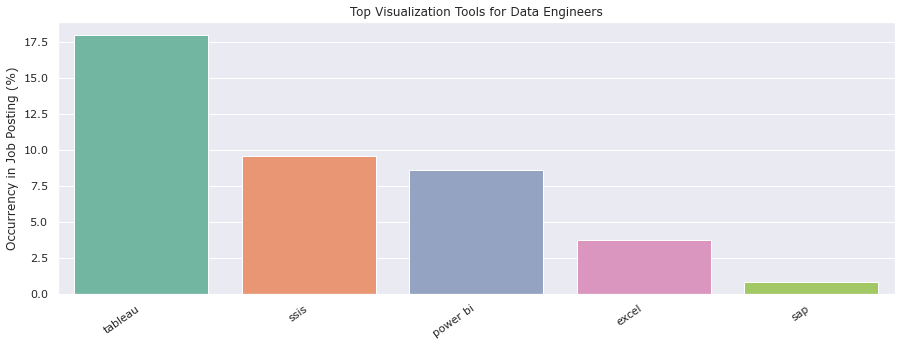

      tools  counts     %
0   tableau     152  18.0
1      ssis      81   9.6
2  power bi      73   8.6
3     excel      31   3.7
4       sap       7   0.8


In [8]:
chart_data(SalaryData['job_viz'], viz_tools,title= "Top Visualization Tools for Data Engineers")

#### Database

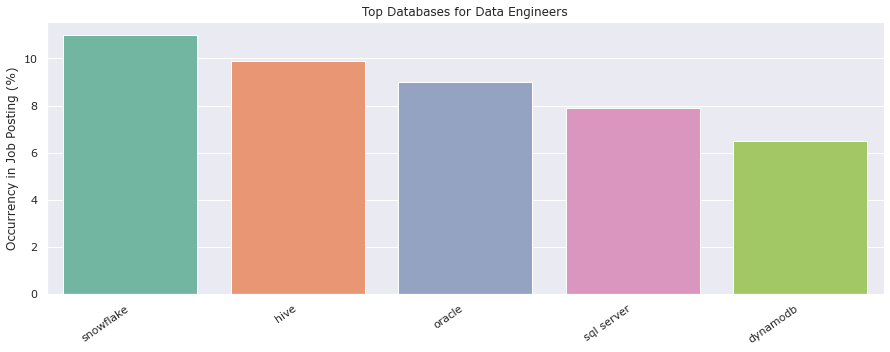

        tools  counts     %
0   snowflake      93  11.0
1        hive      84   9.9
2      oracle      76   9.0
3  sql server      67   7.9
4    dynamodb      55   6.5


In [9]:
chart_data(SalaryData['job_databases'], databases,title= "Top Databases for Data Engineers")

#### Big Data

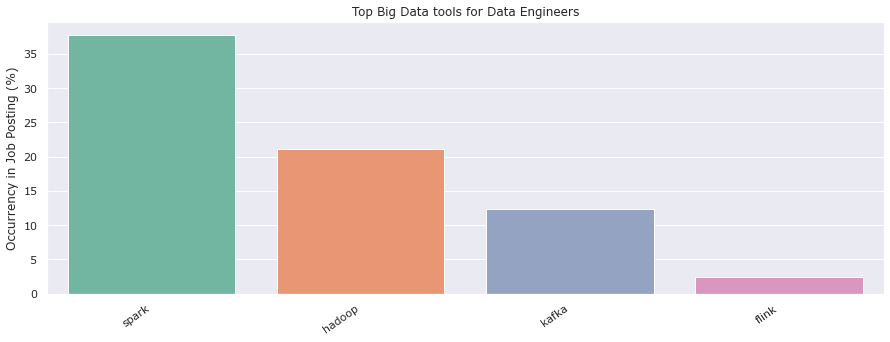

    tools  counts     %
0   spark     319  37.8
1  hadoop     178  21.1
2   kafka     105  12.4
3   flink      20   2.4


In [10]:
chart_data(SalaryData['job_bigdata'], big_data,title= "Top Big Data tools for Data Engineers")

#### Dev Ops

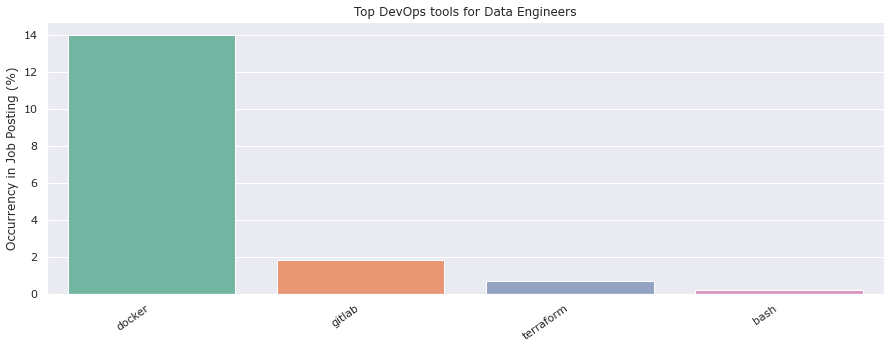

       tools  counts     %
0     docker     118  14.0
1     gitlab      15   1.8
2  terraform       6   0.7
3       bash       2   0.2


In [11]:
chart_data(SalaryData['job_devops'], devops,title= "Top DevOps tools for Data Engineers")

## 2. Education and Experience Requirement

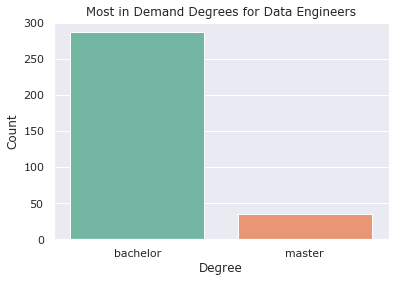

bachelor    287
master       35
Name: job_education, dtype: int64


In [12]:
edu_count = SalaryData['job_education'].value_counts()

sns.countplot(data=SalaryData, x='job_education')

plt.title('Most in Demand Degrees for Data Engineers')
plt.xlabel('Degree')
plt.ylabel('Count')

plt.show()
print(edu_count)

Bachelor's degree required for data engineer jobs.

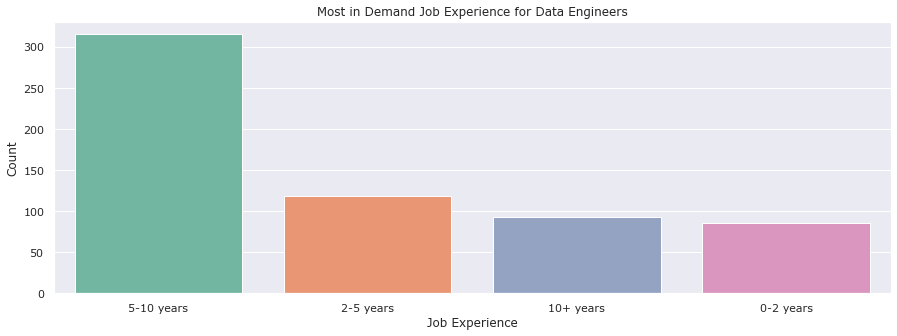

5-10 years    315
2-5 years     118
10+ years      93
0-2 years      85
Name: job_experience, dtype: int64


In [13]:
exp_count = SalaryData['job_experience'].value_counts()

plt.figure(figsize=(15, 5))
sns.countplot(data = SalaryData, x = 'job_experience', order = exp_count.index)
plt.title('Most in Demand Job Experience for Data Engineers')
plt.xlabel('Job Experience')
plt.ylabel('Count')

plt.show()
print(exp_count)

## 3. Company and Industry Relevance

Companies that are recruiting Data Engineers the most in Glassdoor

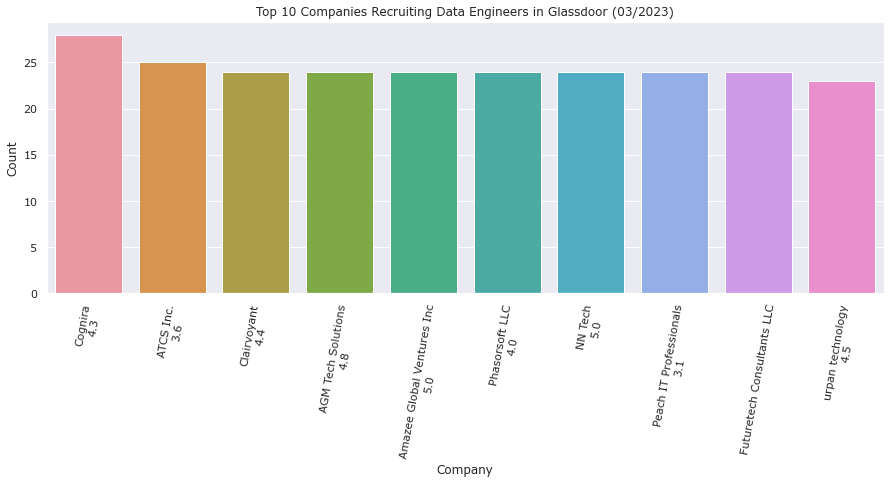

In [14]:
top_ten_c = SalaryData['company'].value_counts().head(10)
plt.figure(figsize=(15, 5))
sns.countplot(data = SalaryData, x='company', order=top_ten_c.index)
plt.title("Top 10 Companies Recruiting Data Engineers in Glassdoor (03/2023)")
plt.xlabel('Company')
plt.ylabel('Count')
plt.xticks(rotation=80)
plt.show()

Industries that are in need of Data Engineers, according to data on Glassdoor.
IT support service industry job positions are most popular.

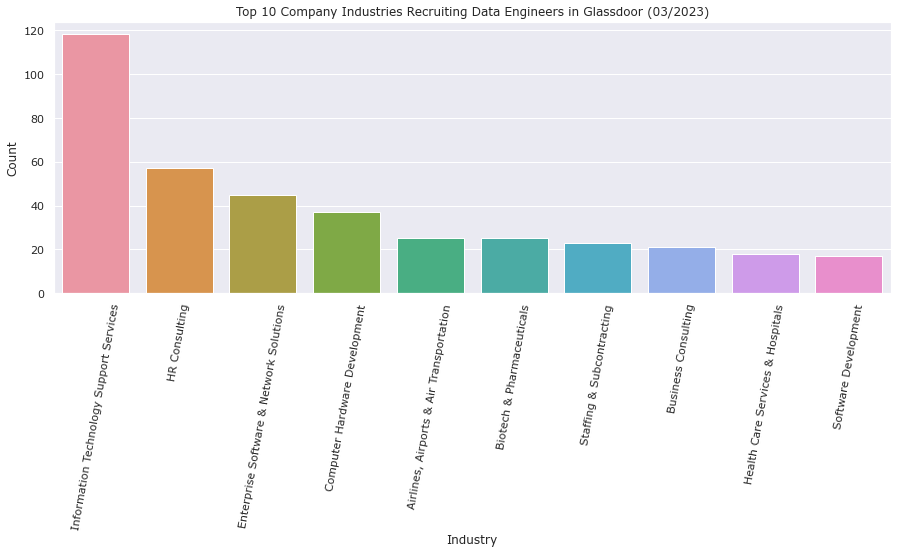

In [15]:
top_ten_ind = SalaryData['company_industry'].value_counts().head(10)
plt.figure(figsize=(15, 5))
sns.countplot(x='company_industry', order=top_ten_ind.index, data=SalaryData)
plt.title("Top 10 Company Industries Recruiting Data Engineers in Glassdoor (03/2023)")
plt.xlabel('Industry')
plt.ylabel('Count')
plt.xticks(rotation=80)
plt.show()

# Salary Analsys

## 1. Examine Salary Data

In [16]:
print(SalaryData.describe().loc[:, ['salary_estimate']].round(decimals=1))

       salary_estimate
count            793.0
mean          107145.7
std            23817.4
min            54000.0
25%            89485.0
50%           108000.0
75%           121500.0
max           237500.0


<Figure size 1080x360 with 0 Axes>

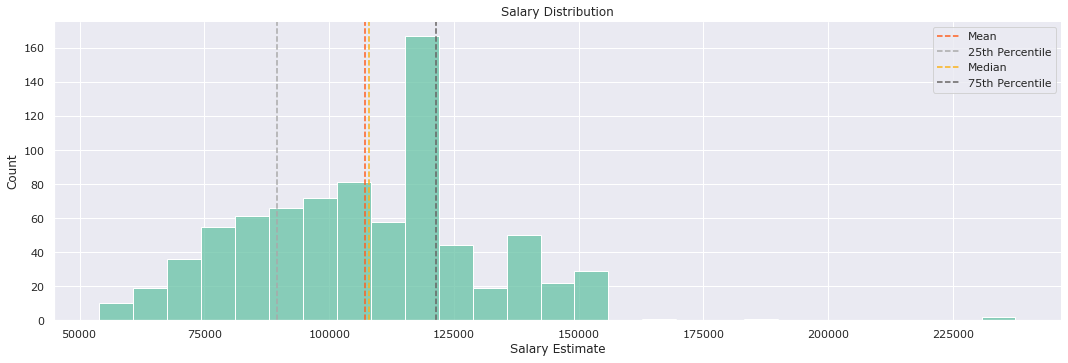

In [72]:
plt.figure(figsize=(15, 5))
sns.set_theme(style='darkgrid', palette='Set2', font='Verdana')
sns.displot(SalaryData, x='salary_estimate', aspect=3)

mean_value = SalaryData['salary_estimate'].mean()
median_value = SalaryData['salary_estimate'].median()
percentile_25 = SalaryData['salary_estimate'].quantile(0.25)
percentile_75 = SalaryData['salary_estimate'].quantile(0.75)
plt.axvline(mean_value, color='#ff5f1f', linestyle='--', label='Mean')
plt.axvline(percentile_25, color='#a9a9a9', linestyle='--', label='25th Percentile')
plt.axvline(median_value, color='#fbb117', linestyle='--', label='Median')
plt.axvline(percentile_75, color='#666362', linestyle='--', label='75th Percentile')

plt.title('Salary Distribution')
plt.xlabel('Salary Estimate')
plt.ylabel('Count')
plt.legend()

plt.show()

## 2. Salary Correlation with Company Profile & Job Specification

###  Encode text columns

In [18]:
from sklearn.preprocessing import LabelEncoder

columns_to_encode = ['company_size', 'company_type', 'company_sector', 'company_industry', 'company_revenue', 'job_state', 'seniority', 'job_education', 'job_experience']
label_encoder = LabelEncoder()

# Iterate over the columns and encode them
for column in columns_to_encode:
    SalaryData[column + '_encoded'] = label_encoder.fit_transform(SalaryData[column])
    # Print the mapping for the encoded column
    print(column + '_mapping:')
    for i, class_label in enumerate(label_encoder.classes_):
        print(class_label, '->', i)
    print('')

SalaryData.head()

company_size_mapping:
1 to 50 Employees -> 0
10000+ Employees -> 1
1001 to 5000 Employees -> 2
201 to 500 Employees -> 3
5001 to 10000 Employees -> 4
501 to 1000 Employees -> 5
51 to 200 Employees -> 6
Unknown -> 7
nan -> 8

company_type_mapping:
Company - Private -> 0
Company - Public -> 1
Contract -> 2
Hospital -> 3
Nonprofit Organization -> 4
Private Practice / Firm -> 5
Subsidiary or Business Segment -> 6
nan -> 7

company_sector_mapping:
Aerospace & Defense -> 0
Arts, Entertainment & Recreation -> 1
Energy, Mining & Utilities -> 2
Financial Services -> 3
Government & Public Administration -> 4
Healthcare -> 5
Hotels & Travel Accommodation -> 6
Human Resources & Staffing -> 7
Information Technology -> 8
Management & Consulting -> 9
Manufacturing -> 10
Media & Communication -> 11
Personal Consumer Services -> 12
Pharmaceutical & Biotechnology -> 13
Retail & Wholesale -> 14
Transportation & Logistics -> 15
nan -> 16

company_industry_mapping:
Accounting & Tax -> 0
Advertising & Publi

,company,company_rating,location,job_title,job_description,salary_estimate,company_size,company_type,company_sector,company_industry,...,job_experience,company_size_encoded,company_type_encoded,company_sector_encoded,company_industry_encoded,company_revenue_encoded,job_state_encoded,seniority_encoded,job_education_encoded,job_experience_encoded
0,PCS Global Tech\n4.7,4.7,"Riverside, CA",Data Engineer | PAID BOOTCAMP,Responsibilities\n· Analyze and organize raw d...,70000.0,501 to 1000 Employees,Company - Private,Information Technology,Information Technology Support Services,...,0-2 years,5,0,8,17,8,0,0,0,0
1,Futuretech Consultants LLC,NaN,"Newton, MS",Snowflake Data Engineer,My name is Dileep and I am a recruiter at Futu...,76500.0,NaN,NaN,NaN,NaN,...,5-10 years,8,7,16,27,9,10,0,0,3
2,Clairvoyant\n4.4,4.4,Remote,Data Engineer (MDM),Required Skills:\nMust have 5-8+ Years of expe...,121500.0,51 to 200 Employees,Company - Private,Pharmaceutical & Biotechnology,Biotech & Pharmaceuticals,...,5-10 years,6,0,13,7,8,18,0,1,3
3,Apple\n4.2,4.2,"Cupertino, CA",Data Engineer,"Summary\nPosted: Dec 22, 2021\nWeekly Hours: 4...",NaN,10000+ Employees,Company - Public,Information Technology,Computer Hardware Development,...,NaN,1,1,8,9,2,0,0,2,4
4,Skytech Consultancy Services\n5.0,5.0,"Baltimore, MD",Data Engineer,Description of Work:\nTechnical experience in ...,117000.0,1 to 50 Employees,Company - Public,NaN,NaN,...,5-10 years,0,1,16,27,8,8,0,0,3


### Correlation matrix

<AxesSubplot:>

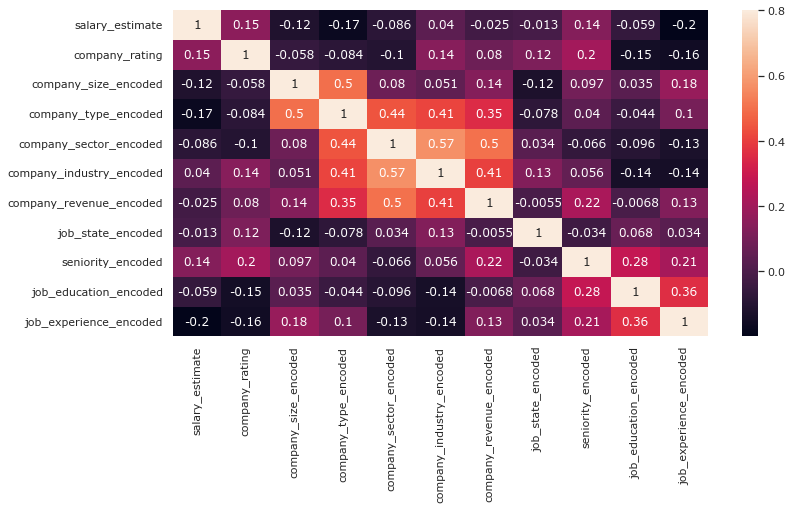

In [19]:
corrmat = SalaryData[['salary_estimate', 'company_rating', 'company_size_encoded', 'company_type_encoded', 'company_sector_encoded', 'company_industry_encoded', 'company_revenue_encoded', 'job_state_encoded', 'seniority_encoded', 'job_education_encoded', 'job_experience_encoded']].corr()
plt.subplots(figsize=(12,6))
sns.heatmap(corrmat, vmax=0.8, annot=True)

### Select the most correlated features to salary for segmentation

In [20]:
# Extract correlations with 'salary_estimate' column
salary_correlations = corrmat['salary_estimate'].drop('salary_estimate')

# Sort correlations from high to low
salary_correlations.abs().sort_values(ascending=False)

job_experience_encoded      0.199168
company_type_encoded        0.168496
company_rating              0.154776
seniority_encoded           0.135648
company_size_encoded        0.116540
company_sector_encoded      0.085553
job_education_encoded       0.058793
company_industry_encoded    0.039843
company_revenue_encoded     0.025107
job_state_encoded           0.012740
Name: salary_estimate, dtype: float64

### -> Select job experience, company type, company rating, seniority and company size for futher analysis

## 3. Segmentation Analysis

### Job Experience

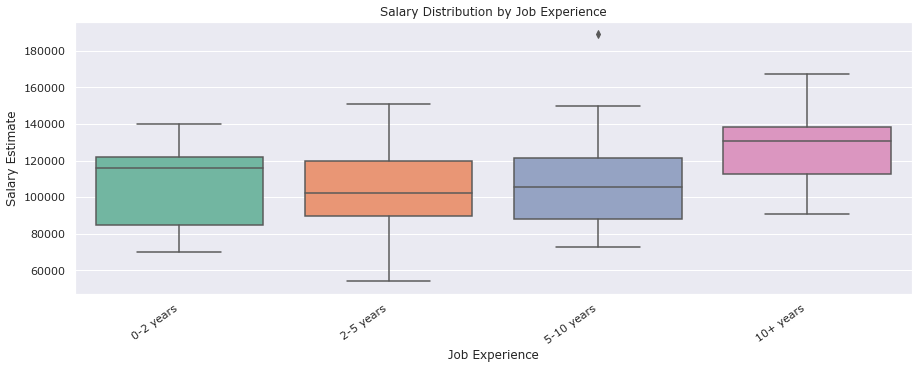

,0-2 years,2-5 years,5-10 years,10+ years
Job Experience,,,,
Number of Data Points,85,118,315,93


In [21]:
# Salary box plot by job experience
plt.figure(figsize=(15, 5))
sns.boxplot(data=SalaryData, x='job_experience', y='salary_estimate', order=['0-2 years', '2-5 years', '5-10 years', '10+ years'])
plt.title('Salary Distribution by Job Experience')
plt.xlabel('Job Experience')
plt.xticks(rotation = 35, ha = "right")
plt.ylabel('Salary Estimate')

plt.show()


# Number of data points by company type
count_by_job_experience = SalaryData['job_experience'].value_counts().loc[['0-2 years', '2-5 years', '5-10 years', '10+ years']]
count_by_job_experience.to_frame(name='Number of Data Points').transpose().rename_axis('Job Experience')

### Company type

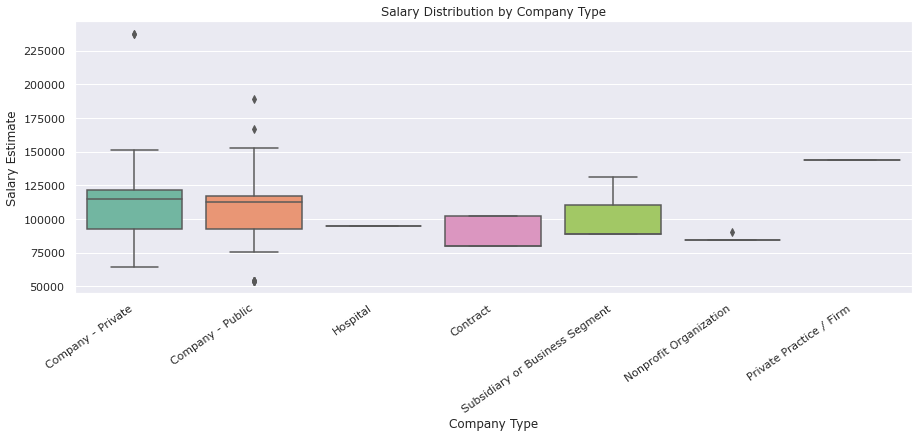

company_type,Company - Private,Company - Public,Contract,Hospital,Nonprofit Organization,Private Practice / Firm,Subsidiary or Business Segment
Number of Data Points,522,180,5,2,6,1,3


In [22]:
# Salary box plot by company type
plt.figure(figsize=(15, 5))
sns.boxplot(data=SalaryData, x='company_type', y='salary_estimate')
plt.title('Salary Distribution by Company Type')
plt.xlabel('Company Type')
plt.xticks(rotation = 35, ha = "right")
plt.ylabel('Salary Estimate')

plt.show()


# Number of data points by company type
count_by_company_type = SalaryData.groupby('company_type').size()
count_by_company_type.to_frame(name='Number of Data Points').transpose()

In [23]:
# Remove outlier
SalaryData_outlier_removed = SalaryData[SalaryData['salary_estimate'] <= 175000]

# Remove company types with <10 data points
company_type_filtered = count_by_company_type[count_by_company_type >= 5].index
SalaryData_company_type_filtered = SalaryData_outlier_removed[SalaryData_outlier_removed['company_type'].isin(company_type_filtered)]

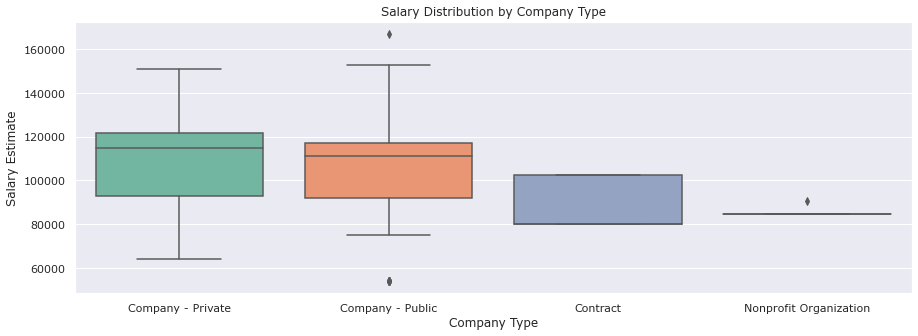

company_type,Company - Private,Company - Public,Contract,Nonprofit Organization
Number of Data Points,491,178,5,6


In [24]:
# Salary box plot by company type
plt.figure(figsize=(15, 5))
sns.boxplot(data=SalaryData_company_type_filtered, x='company_type', y='salary_estimate')
plt.title('Salary Distribution by Company Type')
plt.xlabel('Company Type')
plt.ylabel('Salary Estimate')

plt.show()


# Number of data points by by company type 
count_by_company_type_filtered = SalaryData_company_type_filtered.groupby('company_type').size()
count_by_company_type_filtered.to_frame(name='Number of Data Points').transpose()

### Company rating

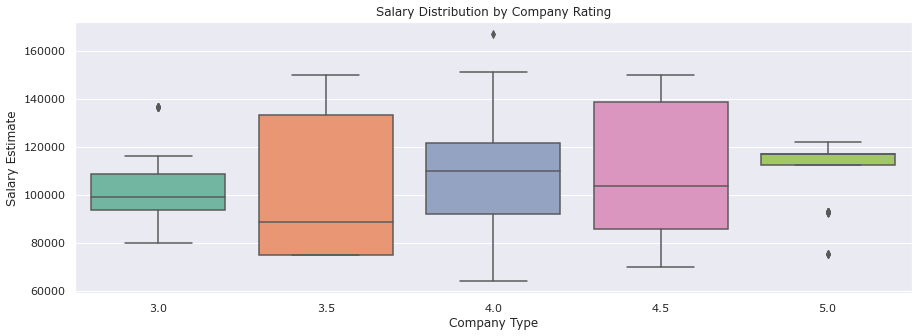

company_rating_group,3.0,3.5,4.0,4.5,5.0
Number of Data Points,69,96,204,153,110


In [25]:
# Group company ratings with 0.5 distance
SalaryData_outlier_removed['company_rating_group'] = np.floor(SalaryData_outlier_removed['company_rating'] * 2) / 2

# Remove company rating groups with <10 data points
count_by_rating_group = SalaryData_outlier_removed.groupby('company_rating_group').size()
count_by_rating_group_filtered = count_by_rating_group[count_by_rating_group >= 10].index
SalaryData_company_rating_group_filtered = SalaryData_outlier_removed[SalaryData_outlier_removed['company_rating_group'].isin(count_by_rating_group_filtered)]


# Salary box plot by company rating group
plt.figure(figsize=(15, 5))
sns.boxplot(data=SalaryData_company_rating_group_filtered, x='company_rating_group', y='salary_estimate')
plt.title('Salary Distribution by Company Rating')
plt.xlabel('Company Type')
plt.ylabel('Salary Estimate')

plt.show()

# Number of data points by company rating group
count_by_rating_group_filtered = SalaryData_company_rating_group_filtered.groupby('company_rating_group').size()
count_by_rating_group_filtered.to_frame(name='Number of Data Points').transpose()

### Seniority

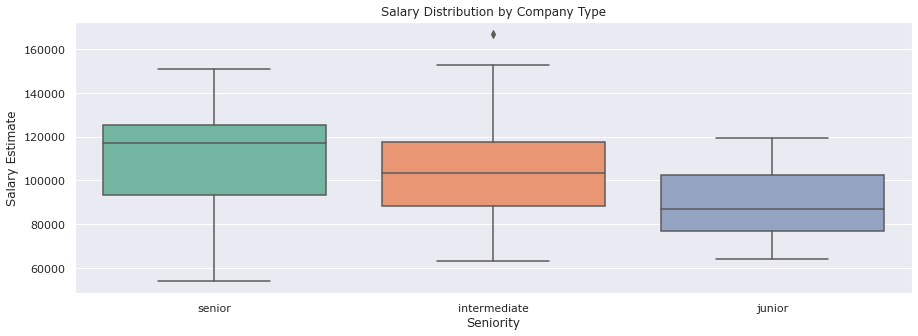

,senior,intermediate,junior
Seniority,,,
Number of Data Points,199,583,8


In [26]:
# Salary box plot by seniority
plt.figure(figsize=(15, 5))
sns.boxplot(data=SalaryData_outlier_removed, x='seniority', y='salary_estimate', order=['senior', 'intermediate', 'junior'])
plt.title('Salary Distribution by Company Type')
plt.xlabel('Seniority')
plt.ylabel('Salary Estimate')

plt.show()


# Number of data points by seniority
count_by_seniority = SalaryData_outlier_removed['seniority'].value_counts().loc[['senior', 'intermediate', 'junior']]
count_by_seniority.to_frame(name='Number of Data Points').transpose().rename_axis('Seniority')

### Company size

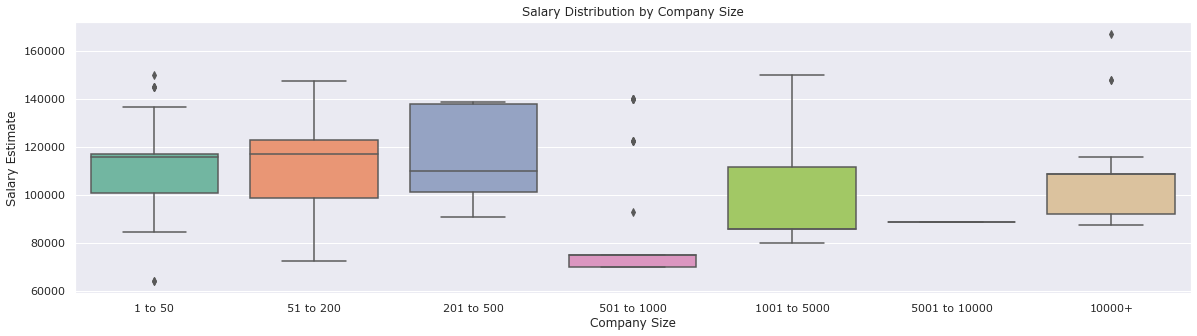

,1 to 50,51 to 200,201 to 500,501 to 1000,1001 to 5000,5001 to 10000,10000+
Company Size,,,,,,,
Number of Data Points,232,231,38,53,51,2,29


In [27]:
# Remove unknown size
SalaryData_company_size_filtered = SalaryData_outlier_removed[SalaryData_outlier_removed['company_size'] !='Unknown']
SalaryData_company_size_filtered['company_size'] = SalaryData_company_size_filtered['company_size'].str.replace(' Employees', '')

# Salary box plot by company size
plt.figure(figsize=(20, 5))
sns.boxplot(data=SalaryData_company_size_filtered, x='company_size', y='salary_estimate', order = ['1 to 50', '51 to 200', '201 to 500', '501 to 1000', '1001 to 5000', '5001 to 10000', '10000+'])
plt.title('Salary Distribution by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Salary Estimate')

plt.show()


# Number of data points by company size
count_by_company_size = SalaryData_company_size_filtered['company_size'].value_counts().loc[['1 to 50', '51 to 200', '201 to 500', '501 to 1000', '1001 to 5000', '5001 to 10000', '10000+']]
count_by_company_size.to_frame(name='Number of Data Points').transpose().rename_axis('Company Size')

### Separate seniority

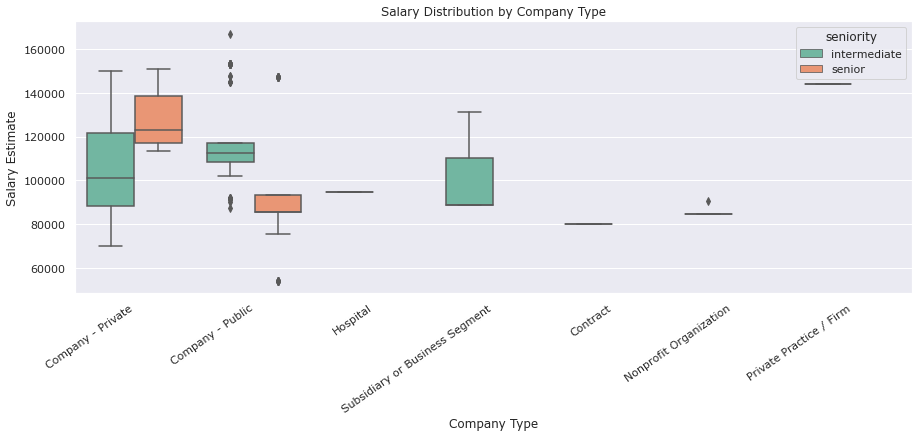

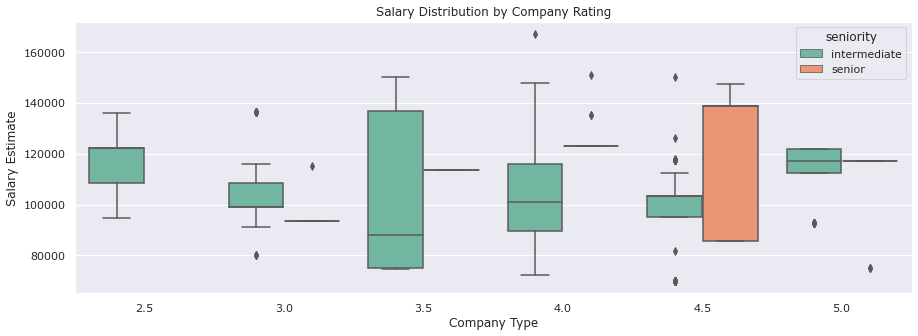

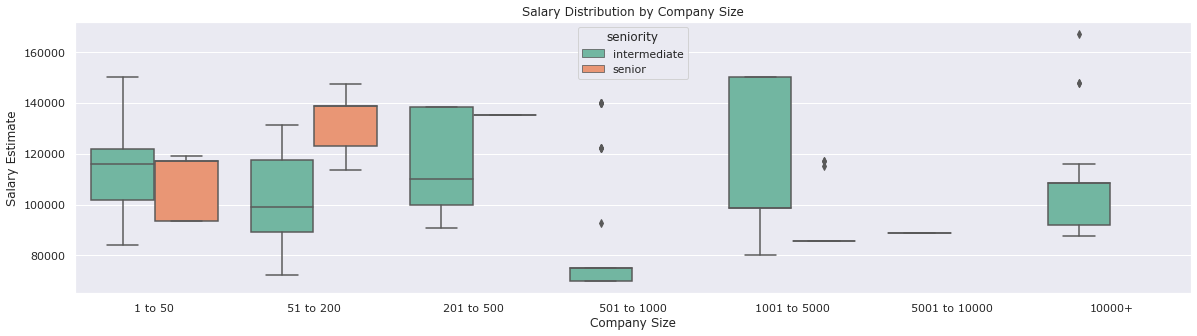

In [28]:
# Remove junior
SalaryData_seniority_filtered = SalaryData_outlier_removed[SalaryData_outlier_removed['seniority'] !='junior']

# Salary box plot by company type
plt.figure(figsize=(15, 5))
sns.boxplot(data=SalaryData_seniority_filtered, x='company_type', y='salary_estimate', hue='seniority')
plt.title('Salary Distribution by Company Type')
plt.xlabel('Company Type')
plt.xticks(rotation = 35, ha = "right")
plt.ylabel('Salary Estimate')

# Salary box plot by company rating group
plt.figure(figsize=(15, 5))
sns.boxplot(data=SalaryData_seniority_filtered, x='company_rating_group', y='salary_estimate', hue='seniority')
plt.title('Salary Distribution by Company Rating')
plt.xlabel('Company Type')
plt.ylabel('Salary Estimate')


SalaryData_company_size_filtered = SalaryData_seniority_filtered[SalaryData_seniority_filtered['company_size'] !='Unknown']
SalaryData_company_size_filtered['company_size'] = SalaryData_company_size_filtered['company_size'].str.replace(' Employees', '')
# Salary box plot by company size
plt.figure(figsize=(20, 5))
sns.boxplot(data=SalaryData_company_size_filtered, x='company_size', y='salary_estimate', hue='seniority', order = ['1 to 50', '51 to 200', '201 to 500', '501 to 1000', '1001 to 5000', '5001 to 10000', '10000+'])
plt.title('Salary Distribution by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Salary Estimate')

plt.show()

# Observation

- Most popular skills
    - Language: SQL (79%), Python (72%)
    - Cloud Tool: AWS (38%)
    - Visualization Tool: Tableau (18%)
    - Database: Snowflake (11%)
    - Big Data: Spark (38%)
    - Dev Ops: Docker (14%)
- Least popular skills
    - Language: NoSQL (13%)
    - Cloud Tool: Snowflake (11%)
    - Visualization Tool: SAP (1%)
    - Database: DynamoDB (7%)
    - Big Data: flink (2%)
    - Dev Ops: Bash (0.2%)
- Education Requirement
    - Only ~38% of job postings specify education requirement
    - Most of the identified requires a bachelor degree with about 11% requires a master degree
- Experience Requirement
    - About 72% of job postings specify experience level
    - Most requires 5 to 10 years of experience
- Top companies can have ~20 job postings at the same time but not sure if they are all different positions
- IT Services is the dominating industry for Data Engineering job
- Salary
    - Both mean and median are close to ~$108k
    - Higher salary is most associated with more job experience, private company, higher company rating, and more senior roles
    - No clear pattern identified for company size even separating seniority    

# Conclusion

- SQL and Python are the two languages required the most
- 38% of job postings requiring a degree seem very low
- Job experience seems more important than education
- For experience requirement, we're not able to tell if it's role experience or experience of a specific skill
- Need more data to better analyze certain segments for salary, such as company type and company size
- March data alone is insufficient to capture seasonality and therefore does not adequately represent the entire US job market

# Next Steps

1. Collect larger dataset for analysis, preferrably 2+ years to capture seasonality
2. Improve how education requirement is identified
3. Explore salary and skill correlation
4. Machine Learning model for salary prediction based on company profile and job specification